### Student Information
Name:蔡明偉

Student ID:114062424

GitHub ID:william-code87

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [1]:
# import library
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from matplotlib import pyplot as plt

In [22]:
# initialize
categories = ['Neutral', 'Positive', 'Negative']
data = pd.read_csv("newdataset\Reddit-stock-sentiment.csv")
data.head()

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0


In [23]:
data.shape

(847, 16)

In [24]:
data['label'] = data['label'].astype(int) # convert label to int
data['label_name'] = data['label'].apply(lambda x: categories[x])
data = data[['text', 'label', 'label_name']]
data.head()

,text,label,label_name
0,Calls on retards,-1,Negative
1,Stunt as in like why did they even make a big ...,0,Neutral
2,Seeing lots of red in the ticker.,0,Neutral
3,Vision Marine Technologies Inc. is rewriting t...,1,Positive
4,He didn’t say thank you.,-1,Negative


In [25]:
# handling missing data
missing_mask = data.applymap(lambda x: pd.isna(x) or str(x).strip() == '') # check for NaN and empty value
missing_counts = missing_mask.sum()

print(missing_counts)

data.dropna(inplace=True)


text          0
label         0
label_name    0
dtype: int64


C:\Users\WILLIAM\AppData\Local\Temp\ipykernel_36832\3930139603.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  missing_mask = data.applymap(lambda x: pd.isna(x) or str(x).strip() == '') # check for NaN and empty value


In [27]:
# handling duplicate data
print(f"Sum duplicates data: {sum(data.duplicated())}")

data.drop_duplicates(keep=False, inplace=True)

print(f"Sum duplicates data after deletion: {sum(data.duplicated())}")
print(f"Data shape:{data.shape}")

Sum duplicates data: 23
Sum duplicates data after deletion: 0
Data shape:(813, 3)


In [ ]:
# data sampling
data_sample = data.sample(n=400)
print(len(data_sample))
print(data_sample.head())

400
                                                  text  label label_name
385  So Japan and Canada are selling treasuries for...     -1   Negative
122  The frame of reference I’m using, are the actu...      0    Neutral
627  just read someone say banks dumped today after...     -1   Negative
249   Trump's Razor that needs to become a common term      0    Neutral
5    Hoping to ejaculate in wet warm puss tonight, ...      0    Neutral


label_name
Neutral     391
Negative    315
Positive    107
Name: count, dtype: int64
label_name
Neutral     208
Negative    143
Positive     49
Name: count, dtype: int64


<Axes: title={'center': 'Category Distribution'}, xlabel='label_name'>

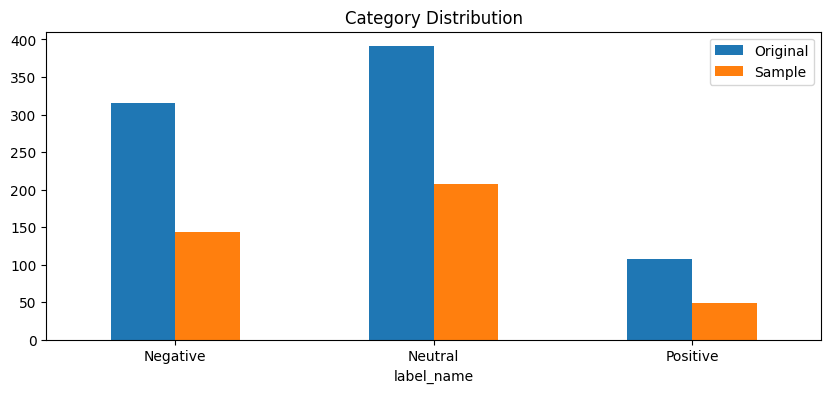

In [ ]:
# Visualize original data and sample data
print(data.label_name.value_counts())
print(data_sample.label_name.value_counts())

orig_counts = data['label_name'].value_counts().sort_index()
sample_counts = data_sample['label_name'].value_counts().sort_index()

comparison_df = pd.DataFrame({
    'Original': orig_counts,
    'Sample': sample_counts
})

comparison_df.plot(kind='bar',
                   figsize=(10,4),
                   title='Category Distribution',
                   rot=0)

In [34]:
# feature creation
import nltk
import helpers.data_mining_helpers as dmh
nltk.download("punkt")
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\WILLIAM\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\WILLIAM\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [35]:
data['unigrams'] = data['text'].apply(lambda x: dmh.tokenize_text(x))
print(data[0:4]["unigrams"])

0                                 [Calls, on, retards]
1    [Stunt, as, in, like, why, did, they, even, ma...
2          [Seeing, lots, of, red, in, the, ticker, .]
3    [Vision, Marine, Technologies, Inc., is, rewri...
Name: unigrams, dtype: object


In [36]:
# Feature subset selection
count_vect = CountVectorizer()
data_counts = count_vect.fit_transform(data.text) 
print(data_counts[0])

  (np.int32(0), np.int32(689))	1
  (np.int32(0), np.int32(2682))	1
  (np.int32(0), np.int32(3220))	1


In [43]:
print(count_vect.get_feature_names_out()[800])
print(data_counts.shape)

christ
(813, 4313)


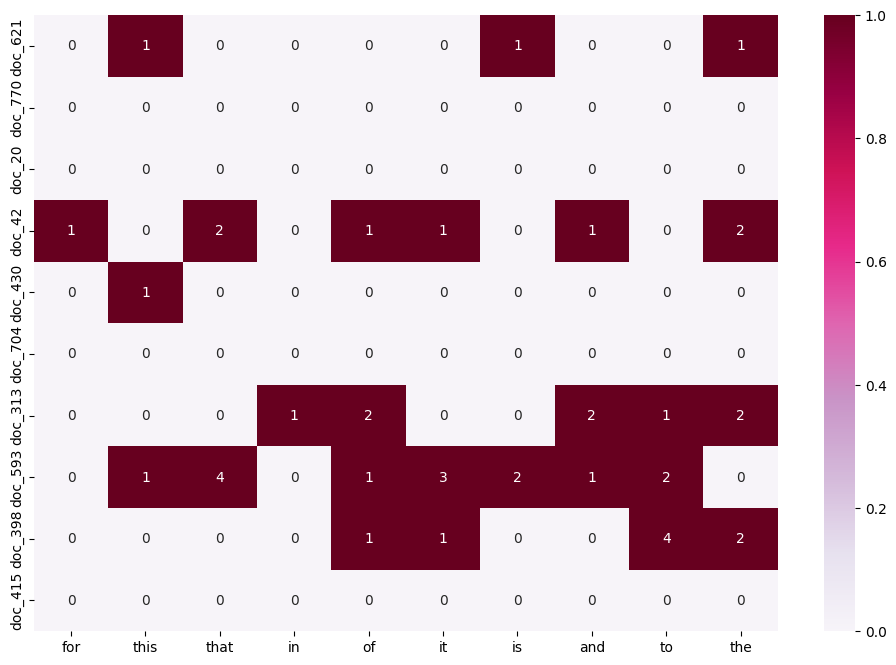

In [54]:
# Heatmap of the 10 most frequent terms and random text
import seaborn as sns

top_n = 10
doc_idx = np.random.choice(data_counts.shape[0], size=10, replace=False)
term_frequencies = np.asarray(data_counts.sum(axis=0)).flatten()
top_terms_idx = term_frequencies.argsort()[-top_n:]
plot_z = data_counts[doc_idx, :][:, top_terms_idx].toarray()
plot_x = count_vect.get_feature_names_out()[top_terms_idx]
plot_y = ["doc_" + str(i) for i in doc_idx]

df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)
plt.figure(figsize=(12, 8))
sns.heatmap(df_todraw, cmap="PuRd", vmin=0, vmax=1, annot=True)
plt.show()

In [48]:
term_frequencies = []
for j in range(0,data_counts.shape[1]):
    term_frequencies.append(sum(data_counts[:,j].toarray()))

term_frequencies = np.asarray(data_counts.sum(axis=0))[0]

print(term_frequencies[0])

4


C:\Users\WILLIAM\AppData\Local\Temp\ipykernel_36832\3480579971.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);


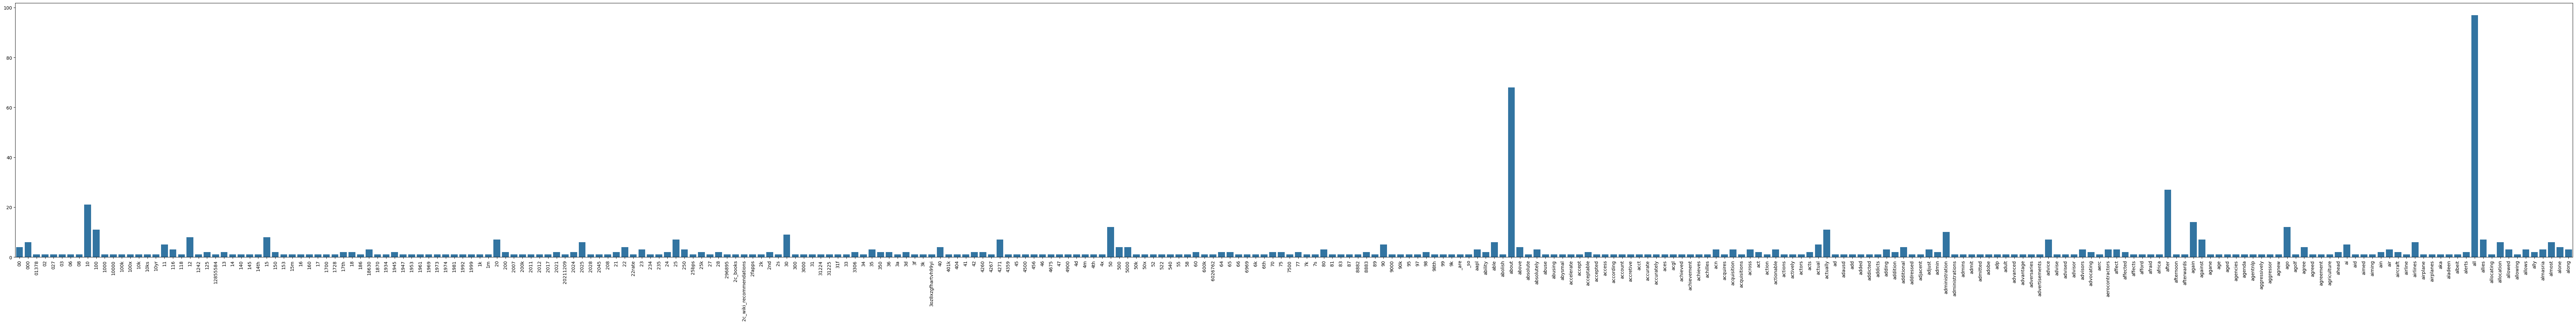

In [55]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

C:\Users\WILLIAM\AppData\Local\Temp\ipykernel_36832\2205743283.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms, y=top_freqs, palette="Purples_r")


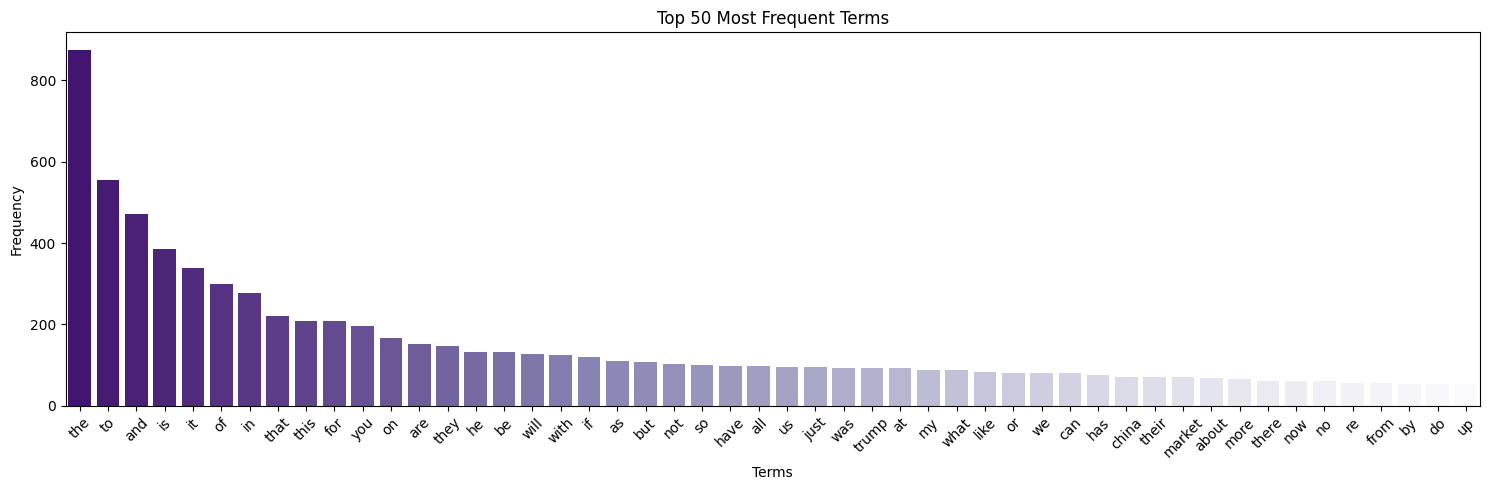

In [67]:
term_frequencies = np.asarray(data_counts.sum(axis=0)).flatten()

# take the 50 most frequent terms
top_n = 50
top_terms_idx = term_frequencies.argsort()[-top_n:][::-1]  # take top-N index
top_terms = count_vect.get_feature_names_out()[top_terms_idx]
top_freqs = term_frequencies[top_terms_idx]

plt.figure(figsize=(15,5))
sns.barplot(x=top_terms, y=top_freqs, palette="Purples_r")
plt.xticks(rotation=45)
plt.xlabel("Terms")
plt.ylabel("Frequency")
plt.title(f"Top {top_n} Most Frequent Terms")
plt.tight_layout()
plt.show()

C:\Users\WILLIAM\AppData\Local\Temp\ipykernel_36832\3655612951.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);


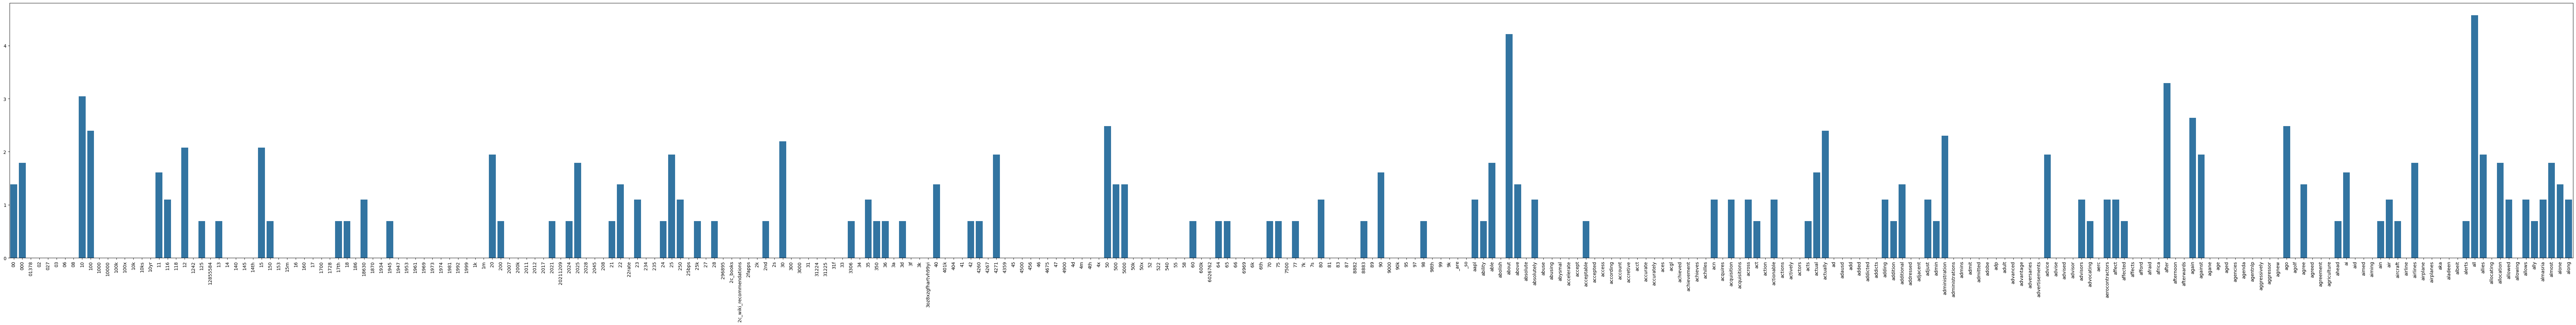

In [68]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

C:\Users\WILLIAM\AppData\Local\Temp\ipykernel_36832\2614657689.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_terms_sorted, y=top_freqs_log_sorted, palette="Purples_r")


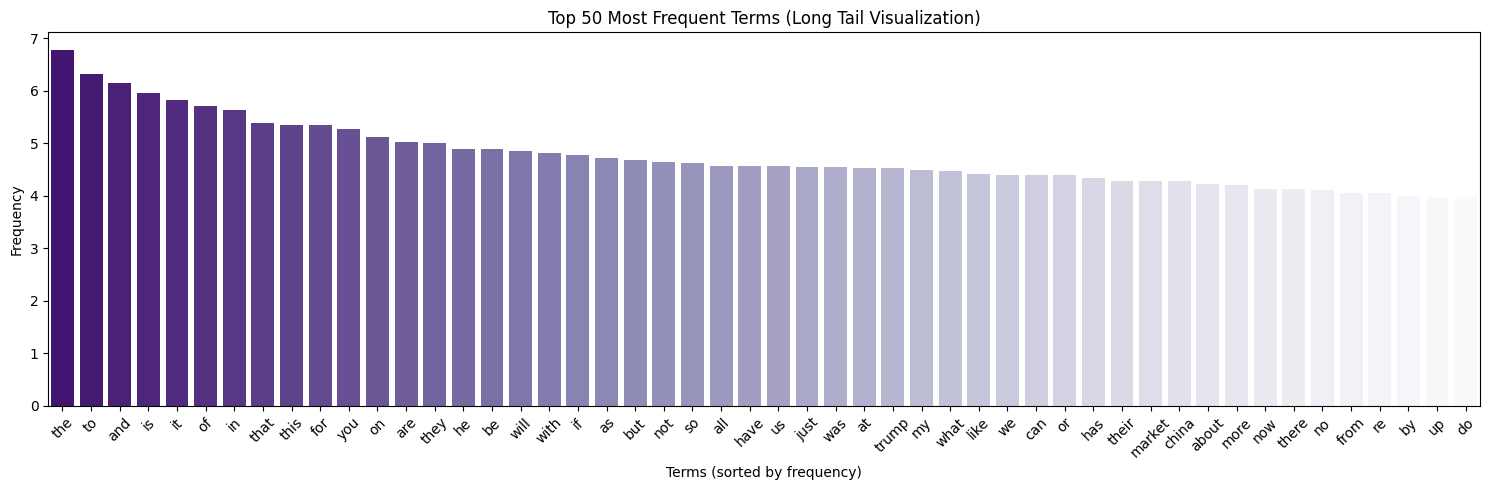

In [69]:
top_freqs_log = np.asarray(term_frequencies_log)[top_terms_idx]

# Sort frequency
sorted_idx = np.argsort(top_freqs_log)[::-1]
top_terms_sorted = top_terms[sorted_idx]
top_freqs_log_sorted = top_freqs_log[sorted_idx]

plt.figure(figsize=(15,5))
sns.barplot(x=top_terms_sorted, y=top_freqs_log_sorted, palette="Purples_r")
plt.xticks(rotation=45)
plt.xlabel("Terms (sorted by frequency)")
plt.ylabel("Frequency")
plt.title(f"Top {top_n} Most Frequent Terms (Long Tail Visualization)")
plt.tight_layout()
plt.show()

# Phase 2

In [2]:
### Begin Assignment Here